Generative Adversarial Networks (GANs)

Definition:

GANs are a type of deep learning algorithm used for unsupervised learning, primarily for generating new, synthetic data that resembles existing data.

Components:

Generator: A neural network that takes a random noise vector as input and produces a synthetic data sample.

Discriminator: A neural network that takes a data sample (real or synthetic) as input and outputs a probability that the sample is real.

Training Process:

The generator produces a synthetic data sample.

The discriminator evaluates the synthetic sample and outputs a probability that it's real.

The generator is trained to minimize the discriminator's accuracy (i.e., to produce more realistic samples).

The discriminator is trained to maximize its accuracy (i.e., to correctly distinguish between real and synthetic samples).

Applications:

Image Generation: GANs can generate realistic images, videos, and 3D models.

Data Augmentation: GANs can generate new training data to augment existing datasets.

Style Transfer: GANs can transfer styles from one image to another.

dc gan > deep conv gen advercial networks

In [3]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm # Progress Bar: Displays a step progress bar with the percentage completed, elapsed time, and estimated remaining time iterate over data
import numpy as np
import matplotlib.pyplot as plt



In [6]:
physical_devices = tf.config.list_physical_devices("GPU")
physical_devices


[]

In [ ]:
# tf.config.experimental.set_memory_growth(physical_devices, True)

In [13]:
from pathlib import Path

In [19]:
dataset = keras.preprocessing.image_dataset_from_directory(
    directory="data", label_mode=None, image_size=(64, 64), batch_size=32,
    shuffle=True, seed=None, validation_split=None,
)

Found 1 files.


In [20]:
dataset

<_PrefetchDataset element_spec=TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None)>

In [21]:
next(iter(dataset)) # batch height width channel


<tf.Tensor: shape=(1, 64, 64, 3), dtype=float32, numpy=
array([[[[171.30652  , 142.30652  , 134.30652  ],
         [171.61719  , 142.61719  , 134.61719  ],
         [172.41406  , 142.41406  , 132.41406  ],
         ...,
         [194.47522  , 142.47522  ,  95.47522  ],
         [200.8258   , 148.8258   , 101.825806 ],
         [194.2909   , 142.2909   ,  94.29089  ]],

        [[182.19531  , 154.       , 143.58594  ],
         [183.55554  , 155.36023  , 144.94617  ],
         [178.63281  , 148.82812  , 137.24219  ],
         ...,
         [196.30066  , 144.87903  ,  98.218506 ],
         [195.24304  , 143.2179   ,  97.46265  ],
         [187.79138  , 135.79138  ,  88.59607  ]],

        [[196.99219  , 167.99219  , 153.99219  ],
         [197.41406  , 168.41406  , 154.41406  ],
         [197.73438  , 168.01562  , 157.01453  ],
         ...,
         [195.07703  , 146.07703  , 103.07703  ],
         [177.96875  , 128.96875  ,  85.96875  ],
         [185.07678  , 132.07678  ,  90.07678  ]

In [22]:
dataset = dataset.map(lambda x: x / 255.0)

In [23]:
next(iter(dataset)) # batch height width channel

<tf.Tensor: shape=(1, 64, 64, 3), dtype=float32, numpy=
array([[[[0.67179024, 0.55806476, 0.5266922 ],
         [0.67300856, 0.5592831 , 0.52791053],
         [0.6761336 , 0.5584865 , 0.51927084],
         ...,
         [0.7626479 , 0.5587264 , 0.37441263],
         [0.7875522 , 0.5836306 , 0.39931688],
         [0.7619251 , 0.5580035 , 0.3697682 ]],

        [[0.7144914 , 0.6039216 , 0.5630821 ],
         [0.7198256 , 0.6092558 , 0.56841636],
         [0.7005208 , 0.5836397 , 0.53820467],
         ...,
         [0.7698065 , 0.568153  , 0.3851706 ],
         [0.765659  , 0.56163883, 0.38220647],
         [0.7364368 , 0.5325152 , 0.34743556]],

        [[0.7725184 , 0.6587929 , 0.60389096],
         [0.7741728 , 0.6604473 , 0.60554534],
         [0.77542895, 0.6588848 , 0.6157432 ],
         ...,
         [0.765008  , 0.57285106, 0.40422362],
         [0.6979167 , 0.5057598 , 0.33713236],
         [0.7257913 , 0.51794815, 0.35324228]],

        ...,

        [[0.7184015 , 0.4995141 , 0.

In [24]:
next(iter(dataset)).shape

TensorShape([1, 64, 64, 3])

In [25]:
discriminator = keras.Sequential(
    [
        keras.Input(shape=(64, 64, 3)), # height , width, channel
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"), # filter 64, padding mode
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(0.2),
        layers.Flatten(), # flatten
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)

d:\a27_YEARS_OLD\pytorch_tutorial\venv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [26]:
discriminator.summary()

Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         8,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 404,801 (1.54 MB)

 Trainable params: 404,801 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
latent_dim = 128

In [ ]:
generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)), # flatten input
        layers.Dense(8 * 8 * 128), # 8192 flattened
        layers.Reshape((8, 8, 128)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid"),
    ],
    name="generator",
)


In [31]:
generator.summary()

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 8192)           │     1,056,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 16, 16, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 32, 32, 256)    │       524,544 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 64, 64, 512)    │     2,097,664 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 64, 64, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 3)      │        38,403 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,979,651 (15.18 MB)

 Trainable params: 3,979,651 (15.18 MB)

 Non-trainable params: 0 (0.00 B)

discriminator and generator. u net

In [27]:
opt_gen = keras.optimizers.Adam(1e-4)
opt_disc = keras.optimizers.Adam(1e-4)
loss_fn = keras.losses.BinaryCrossentropy()

In [33]:

for idx, (real) in enumerate(tqdm(dataset)):
    print(real.shape)
    batch_size = real.shape[0] # 
    print(batch_size)
    # This line gets the batch size from the shape of the real data tensor.

    with tf.GradientTape() as gen_tape: # This line starts a gradient tape context for computing gradients of the generator's loss.
        random_latent_vectors = tf.random.normal(shape = (batch_size, latent_dim))  #This line generates a batch of random latent vectors with shape (batch_size, latent_dim).
        print(random_latent_vectors.shape)
        print(random_latent_vectors)

        fake = generator(random_latent_vectors) # This line passes the random latent vectors through the generator network to produce fake data.
        print(fake.shape)
        print(fake)

  0%|          | 0/1 [00:00<?, ?it/s]

(1, 64, 64, 3)
1
(1, 128)
tf.Tensor(
[[ 0.29351452 -1.405801    0.33740225 -0.28706712 -0.64027596  0.06454991
  -0.4962492  -0.6613196  -1.2378259  -0.14808491  1.0270411   0.6600004
   0.96072143  0.48464587  1.9667078   0.15716018  1.5832886   2.957237
  -0.14558934 -1.1018144   0.6717672  -1.7149912  -1.4648064   2.3382092
   0.9214892   0.21342748 -0.9183313  -0.43778113  0.07010379 -0.10688575
   0.0476757   0.34019625 -2.309858   -0.56468594 -0.2648005  -0.62434155
   1.3534557  -0.75502807 -0.4663634   0.97573847 -0.85362035  0.85088354
   0.7472023   0.64870685 -0.46832967  0.576194    1.2415023   0.30387434
   0.11323806 -1.213071   -0.53419626  0.8974427  -1.176767    0.99913794
   0.50531167 -0.46569502  0.20319869  0.46277902 -0.15954883  0.5799408
   0.09961391 -1.1300071   0.05117722  0.7007028  -0.7520538  -0.91245735
   0.26240095 -0.77006185  0.30467913  0.9840011  -1.2550585   0.31233975
  -0.07797455 -0.42545402 -1.4212362   0.5969269   1.512569    0.5998838
  -1.26

100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

(1, 64, 64, 3)
tf.Tensor(
[[[[0.49945867 0.50011724 0.49959147]
   [0.49994263 0.49985063 0.4998032 ]
   [0.49950442 0.49967384 0.5001664 ]
   ...
   [0.5006287  0.5003878  0.49974257]
   [0.4994952  0.49992207 0.49966848]
   [0.5004184  0.5002122  0.49993572]]

  [[0.5004482  0.5007137  0.5000877 ]
   [0.49838424 0.5000163  0.5003606 ]
   [0.4987613  0.5006268  0.499412  ]
   ...
   [0.49882698 0.50069267 0.4999438 ]
   [0.49976623 0.5009819  0.5009752 ]
   [0.49908805 0.49969247 0.50023454]]

  [[0.49966568 0.49989754 0.4997029 ]
   [0.49917588 0.50080234 0.4991439 ]
   [0.49782872 0.5016638  0.49924263]
   ...
   [0.49986106 0.49936557 0.4995104 ]
   [0.50057447 0.5008534  0.50096405]
   [0.49939713 0.49968404 0.5001167 ]]

  ...

  [[0.500417   0.5005894  0.49992803]
   [0.49964616 0.5001639  0.500002  ]
   [0.49963236 0.50078595 0.50111693]
   ...
   [0.50025797 0.4998783  0.5024379 ]
   [0.5001125  0.4997217  0.49994344]
   [0.49958384 0.49997848 0.5001594 ]]

  [[0.49933976 0.49

In [36]:
fake.shape

TensorShape([1, 64, 64, 3])

In [37]:
fake[0].shape

TensorShape([64, 64, 3])

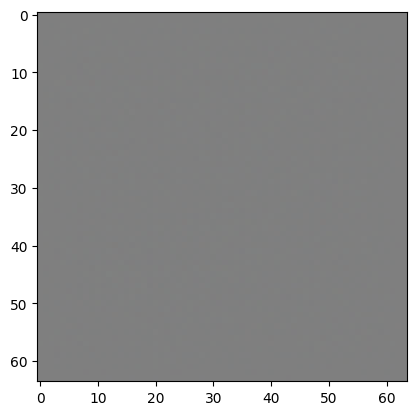

In [38]:
plt.imshow(fake[0])

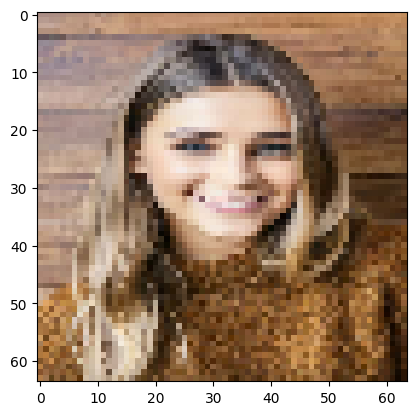

In [43]:
plt.imshow(real[0])

In [39]:
tf.ones((batch_size, 1))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [40]:
discriminator(real)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.49179757]], dtype=float32)>

In [ ]:
loss_fn(tf.ones((batch_size, 1)), discriminator(real)) # loss from one real

<tf.Tensor: shape=(), dtype=float32, numpy=0.709688127040863>

In [44]:
tf.zeros((batch_size, 1))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.]], dtype=float32)>

In [45]:
discriminator(fake)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.48124397]], dtype=float32)>

In [46]:
loss_fn(tf.zeros((batch_size, 1)), discriminator(fake)) # loss from 0 to fake

<tf.Tensor: shape=(), dtype=float32, numpy=0.6563215851783752>

In [ ]:

# This code snippet is used to calculate the discriminator's loss in a Generative Adversarial Network (GAN) using TensorFlow.
# Breakdown:
# with tf.GradientTape() as disc_tape::
# This line starts a gradient tape context for computing gradients of the discriminator's loss.
# loss_disc_real = loss_fn(tf.ones((batch_size, 1)), discriminator(real)):
# This line calculates the loss for the discriminator when it's presented with real data.
# tf.ones((batch_size, 1)) creates a tensor of ones with shape (batch_size, 1), which represents the expected output for real data (i.e., the discriminator should output 1 for real data).
# discriminator(real) passes the real data through the discriminator network to get its output.
# loss_fn computes the loss between the expected output and the discriminator's output.
# loss_disc_fake = loss_fn(tf.zeros((batch_size, 1)), discriminator(fake)):
# This line calculates the loss for the discriminator when it's presented with fake data.
# tf.zeros((batch_size, 1)) creates a tensor of zeros with shape (batch_size, 1), which represents the expected output for fake data (i.e., the discriminator should output 0 for fake data).
# discriminator(fake) passes the fake data through the discriminator network to get its output.
# loss_fn computes the loss between the expected output and the discriminator's output.
# loss_disc = (loss_disc_real + loss_disc_fake)/2:
# This line calculates the total loss for the discriminator by averaging the losses for real and fake data.
# Purpose:
# This code is used to train the discriminator in a GAN. The discriminator's loss is calculated by comparing its output to the expected output (1 for real data and 0 for fake data). The gradients of this loss are then used to update the discriminator's weights.

In [47]:
with tf.GradientTape() as disc_tape:
    loss_disc_real = loss_fn(tf.ones((batch_size, 1)), discriminator(real))
    loss_disc_fake = loss_fn(tf.zeros((batch_size, 1)), discriminator(fake))
    loss_disc = (loss_disc_real + loss_disc_fake)/2

In [48]:
loss_disc

<tf.Tensor: shape=(), dtype=float32, numpy=0.6830048561096191>

In [49]:
grads = disc_tape.gradient(loss_disc, discriminator.trainable_weights)

In [50]:
grads

[<tf.Tensor: shape=(4, 4, 3, 64), dtype=float32, numpy=
 array([[[[-4.84942645e-03,  1.94351538e-04, -1.38889626e-03, ...,
            9.53164767e-04,  1.99555652e-03, -7.14540132e-04],
          [-3.79596581e-03,  4.77223308e-04, -1.43261440e-03, ...,
            1.14136550e-03,  2.36828206e-03, -6.45723077e-04],
          [-2.15326343e-03,  4.87463898e-04, -1.59609364e-03, ...,
            1.41287921e-03,  2.40040431e-03, -5.58365835e-04]],
 
         [[-2.75565148e-03,  1.07769505e-04, -1.12571148e-03, ...,
            9.53582348e-04,  1.90703105e-03,  6.47364592e-04],
          [-1.35850708e-03,  3.67436151e-04, -1.20000157e-03, ...,
            1.24733988e-03,  2.58747023e-03,  7.44617428e-04],
          [ 1.67199702e-04,  2.92466604e-04, -1.34046189e-03, ...,
            1.57844042e-03,  2.93474970e-03,  7.80939474e-04]],
 
         [[-1.48596324e-03,  1.52881257e-04, -9.82691650e-04, ...,
            1.14564062e-03,  1.98783027e-03,  4.97341622e-04],
          [-1.04899367e-03, 

In [51]:
opt_disc.apply_gradients(
    zip(grads, discriminator.trainable_weights)
)

<Variable path=adam/iteration, shape=(), dtype=int64, value=1>

In [52]:
grads

[<tf.Tensor: shape=(4, 4, 3, 64), dtype=float32, numpy=
 array([[[[-4.84942645e-03,  1.94351538e-04, -1.38889626e-03, ...,
            9.53164767e-04,  1.99555652e-03, -7.14540132e-04],
          [-3.79596581e-03,  4.77223308e-04, -1.43261440e-03, ...,
            1.14136550e-03,  2.36828206e-03, -6.45723077e-04],
          [-2.15326343e-03,  4.87463898e-04, -1.59609364e-03, ...,
            1.41287921e-03,  2.40040431e-03, -5.58365835e-04]],
 
         [[-2.75565148e-03,  1.07769505e-04, -1.12571148e-03, ...,
            9.53582348e-04,  1.90703105e-03,  6.47364592e-04],
          [-1.35850708e-03,  3.67436151e-04, -1.20000157e-03, ...,
            1.24733988e-03,  2.58747023e-03,  7.44617428e-04],
          [ 1.67199702e-04,  2.92466604e-04, -1.34046189e-03, ...,
            1.57844042e-03,  2.93474970e-03,  7.80939474e-04]],
 
         [[-1.48596324e-03,  1.52881257e-04, -9.82691650e-04, ...,
            1.14564062e-03,  1.98783027e-03,  4.97341622e-04],
          [-1.04899367e-03, 

In [53]:
with tf.GradientTape() as gen_tape:
    fake = generator(random_latent_vectors)
    output = discriminator(fake)
    loss_gen = loss_fn(tf.ones(batch_size, 1), output)

In [54]:
loss_gen

<tf.Tensor: shape=(), dtype=float32, numpy=0.7395305037498474>

In [55]:
output

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.47733796]], dtype=float32)>

In [56]:
fake

<tf.Tensor: shape=(1, 64, 64, 3), dtype=float32, numpy=
array([[[[0.49945867, 0.50011724, 0.49959147],
         [0.49994263, 0.49985063, 0.4998032 ],
         [0.49950442, 0.49967384, 0.5001664 ],
         ...,
         [0.5006287 , 0.5003878 , 0.49974257],
         [0.4994952 , 0.49992207, 0.49966848],
         [0.5004184 , 0.5002122 , 0.49993572]],

        [[0.5004482 , 0.5007137 , 0.5000877 ],
         [0.49838424, 0.5000163 , 0.5003606 ],
         [0.4987613 , 0.5006268 , 0.499412  ],
         ...,
         [0.49882698, 0.50069267, 0.4999438 ],
         [0.49976623, 0.5009819 , 0.5009752 ],
         [0.49908805, 0.49969247, 0.50023454]],

        [[0.49966568, 0.49989754, 0.4997029 ],
         [0.49917588, 0.50080234, 0.4991439 ],
         [0.49782872, 0.5016638 , 0.49924263],
         ...,
         [0.49986106, 0.49936557, 0.4995104 ],
         [0.50057447, 0.5008534 , 0.50096405],
         [0.49939713, 0.49968404, 0.5001167 ]],

        ...,

        [[0.500417  , 0.5005894 , 0.

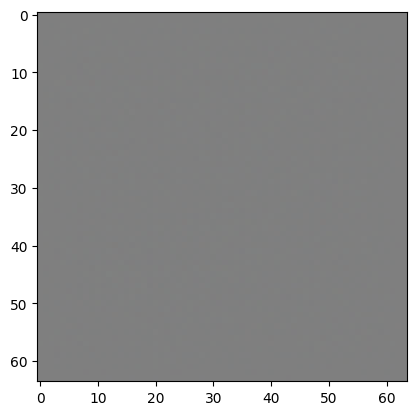

In [57]:
plt.imshow(fake[0])

In [58]:
grads = gen_tape.gradient(loss_gen, generator.trainable_weights)
opt_gen.apply_gradients(zip(grads, generator.trainable_weights))

<Variable path=adam/iteration, shape=(), dtype=int64, value=1>